# Baseline CNN Model

This model is a simple CNN used to verify that such an architecture is able to train on the data and provide baseline performance. The architecture is based on the baseline model used in this [paper](https://ieeexplore.ieee.org/document/8392660) but does not make use of dropout layers or any other form of regularization.

### Imports

In [3]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from utils import data, eval, models, train

### Initialize Dataset

In [1]:
# Constants
DATA_DIR = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'
SAVE_MODEL_FILE = 'models/cnn_paper.pt'
SEED = 0
NUM_SAMPLES = 10000
DATASET_SPLIT = [0.7, 0.15, 0.15] # Train / Valid / Test Split
BATCH_SIZE = 100
LEARN_RATE = 5e-4
EPOCHS = 20
IMAGE_SIZE = (100, 100)
WEIGHT_DECAY = 1e-3

In [4]:
# Seed PyTorch
torch.manual_seed(SEED)

# Image transforms
trans = T.Compose([
    T.ToTensor(),
    T.Resize(IMAGE_SIZE),
    T.Normalize((0.5190, 0.4992, 0.5140), 
                (0.2244, 0.2523, 0.2616))
])

# Initialize datasets
dataset = torchvision.datasets.ImageFolder(
    root=DATA_DIR,
    transform=trans
)

# Split dataset into training, validation and test sets
train_loader, valid_loader, test_loader = data.split_dataset(dataset, NUM_SAMPLES, DATASET_SPLIT, BATCH_SIZE, SEED)

# Check for CUDA GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


### Model

In [5]:
import torch.nn as nn

# Instantiate model and move to GPU if available
model = models.CNN_Baseline()
model = model.to(device)

### Training

In [5]:
# Train model and save model weights and training metrics
metrics = train.train_model(model, train_loader, valid_loader, LEARN_RATE, EPOCHS, device, WEIGHT_DECAY, conv=True)
data.save_model(SAVE_MODEL_FILE, model, metrics)

Epoch 1 | Loss = 2.9069 | Train Accuracy = 18.99% | Valid Accuracy = 18.40% | Time = 0:00:41
Epoch 2 | Loss = 2.3937 | Train Accuracy = 30.20% | Valid Accuracy = 27.00% | Time = 0:00:37
Epoch 3 | Loss = 1.9039 | Train Accuracy = 44.29% | Valid Accuracy = 41.53% | Time = 0:00:37
Epoch 4 | Loss = 1.6298 | Train Accuracy = 56.53% | Valid Accuracy = 50.40% | Time = 0:00:37
Epoch 5 | Loss = 1.4730 | Train Accuracy = 58.69% | Valid Accuracy = 52.80% | Time = 0:00:38
Epoch 6 | Loss = 1.2922 | Train Accuracy = 62.69% | Valid Accuracy = 55.73% | Time = 0:00:37
Epoch 7 | Loss = 1.1262 | Train Accuracy = 68.77% | Valid Accuracy = 62.60% | Time = 0:00:40
Epoch 8 | Loss = 1.0446 | Train Accuracy = 74.30% | Valid Accuracy = 65.73% | Time = 0:00:38
Epoch 9 | Loss = 0.9049 | Train Accuracy = 78.51% | Valid Accuracy = 67.80% | Time = 0:00:37
Epoch 10 | Loss = 0.8885 | Train Accuracy = 77.97% | Valid Accuracy = 70.93% | Time = 0:00:38
Epoch 11 | Loss = 0.8145 | Train Accuracy = 80.37% | Valid Accuracy =

### Evaluation

Final Train Accuracy = 89.34%
Final Valid Accuracy  = 78.80%
Average Epoch Time   = 38.71s


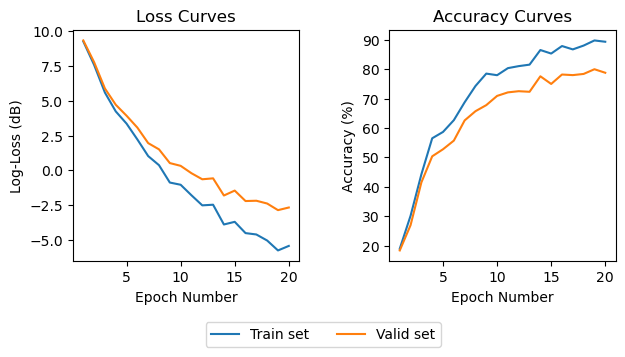

In [6]:
# Load model and show trainig and evaluation metrics
metrics = data.load_model(SAVE_MODEL_FILE, model)
eval.plot_metrics(metrics)

Precision = 0.7934
Recall = 0.7795
F1 = 0.7774
Accuracy = 0.7793


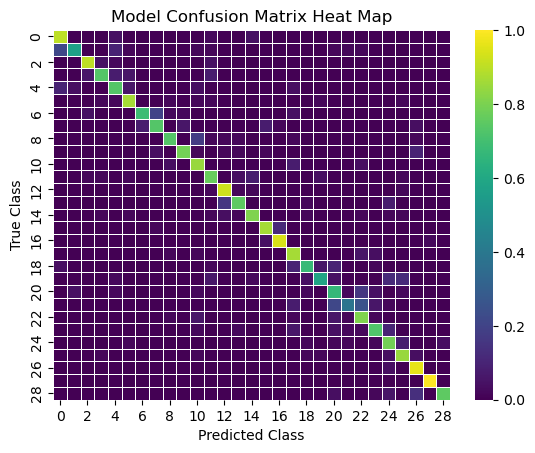

In [9]:
eval_metrics = eval.eval_model(model, test_loader, device, conv=True)